In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2022/train_labels.csv
/kaggle/input/tabular-playground-series-apr-2022/train.csv
/kaggle/input/tabular-playground-series-apr-2022/test.csv


---
$\Huge{Tabular\ Playground\ Series\ -\ Apr\ 2022}$

$Practice\ your\ ML\ skills\ on\ this\ approachable\ dataset!$

---

# Overview

## Description

Welcome to the April edition of the 2022 Tabular Playground Series! This month's challenge is a time series classification problem.

You've been provided with thousands of sixty-second sequences of biological sensor data recorded from several hundred participants who could have been in either of two possible activity states. Can you determine what state a participant was in from the sensor data?

### About the Tabular Playground Series

Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, we've launched many Playground competitions that are more approachable than our Featured competitions and thus, more beginner-friendly.

The goal of these competitions is to provide a fun and approachable-for-anyone tabular dataset to model. These competitions are a great choice for people looking for something in between the Titanic Getting Started competition and the Featured competitions. If you're an established competitions master or grandmaster, these probably won't be much of a challenge for you; thus, we encourage you to avoid saturating the leaderboard.

For each monthly competition, we'll be offering Kaggle Merchandise for the top three teams. And finally, because we want these competitions to be more about learning, we're limiting team sizes to 3 individuals.

## Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

### Submission File

For each sequence in the test set, you must predict a probability for the state variable. The file should contain a header and have the following format:

```
sequence,state
25968,0
25969,0
25970,0
...
```

In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cycler
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('../input/tabular-playground-series-apr-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-apr-2022/test.csv')
submission = pd.read_csv("../input/tabular-playground-series-apr-2022/sample_submission.csv")
labels = pd.read_csv("../input/tabular-playground-series-apr-2022/train_labels.csv")

train

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
0,0,47,0,-0.196291,0.112395,1.000000,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492
1,0,47,1,-0.447450,0.134454,1.000000,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390
2,0,47,2,0.326893,-0.694328,1.000000,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147
3,0,47,3,0.523184,0.751050,1.000000,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241
4,0,47,4,0.272025,1.074580,1.000000,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558075,25967,327,55,-0.282844,-1.217437,-1.666153,0.586726,-0.930698,-0.451010,-0.651184,0.368702,0.4,0.008671,-0.723536,-0.353909,-0.914749
1558076,25967,327,56,0.130603,0.349790,-1.666153,-0.324779,0.775324,-0.332835,0.099271,0.122137,-0.2,0.644509,0.691407,-0.613169,-0.515772
1558077,25967,327,57,-0.579598,0.429622,-1.666153,0.319469,0.308861,0.282723,-0.512750,0.012214,-1.6,-0.424133,0.716855,1.628601,0.928389
1558078,25967,327,58,1.278980,1.711134,-1.522820,0.802655,-0.460541,-0.055348,2.405282,0.043511,1.9,0.283960,-0.914914,0.364198,0.211424


In [4]:
train.describe()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12
count,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06,1.558080e+06
mean,1.298350e+04,3.316331e+02,2.950000e+01,4.365526e-04,-1.034982e-03,-2.178045e-01,-2.156555e-03,-1.828903e-03,-1.651785e-03,-4.122917e-04,-2.620665e-05,-1.298393e-04,1.365584e-03,3.315801e-04,-3.733291e-03,-1.172605e-02
std,7.496318e+03,1.958257e+02,1.731811e+01,2.658684e+00,4.404200e+00,2.298002e+00,3.934184e+00,1.683685e+00,1.590818e+00,3.345143e+00,3.243428e+00,4.501534e+00,2.592913e+00,1.917333e+00,4.532568e+00,3.911767e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.750634e+02,-4.345977e+02,-3.165948e+01,-4.083761e+02,-2.362601e+01,-7.498280e+01,-4.705046e+02,-4.070115e+02,-5.361000e+02,-2.703468e+02,-4.341271e+01,-4.270586e+02,-6.125494e+02
25%,6.491750e+03,1.617500e+02,1.475000e+01,-5.000000e-01,-4.831933e-01,-6.461531e-01,-4.929204e-01,-4.729928e-01,-4.786836e-01,-4.927140e-01,-5.022901e-01,-5.000000e-01,-5.151734e-01,-4.787939e-01,-4.835391e-01,-5.805627e-01
50%,1.298350e+04,3.350000e+02,2.950000e+01,-3.091190e-03,3.151261e-03,0.000000e+00,0.000000e+00,-1.589577e-03,2.991773e-03,9.107468e-04,-2.290076e-03,0.000000e+00,-1.445087e-03,-1.655822e-03,3.086420e-03,0.000000e+00
75%,1.947525e+04,5.010000e+02,4.425000e+01,4.845440e-01,4.926471e-01,3.338469e-01,4.893805e-01,4.701565e-01,5.056096e-01,4.927140e-01,4.847328e-01,5.000000e-01,5.086705e-01,4.780386e-01,4.938272e-01,5.703325e-01
max,2.596700e+04,6.710000e+02,5.900000e+01,3.358246e+02,4.495914e+02,1.666667e+00,4.366504e+02,2.487286e+01,7.791548e+01,4.425009e+02,3.312542e+02,6.301000e+02,3.679812e+02,4.186559e+01,4.480206e+02,6.305111e+02


In [5]:
train.isnull().sum(axis=0)

sequence     0
subject      0
step         0
sensor_00    0
sensor_01    0
sensor_02    0
sensor_03    0
sensor_04    0
sensor_05    0
sensor_06    0
sensor_07    0
sensor_08    0
sensor_09    0
sensor_10    0
sensor_11    0
sensor_12    0
dtype: int64

In [6]:
labels.head()

,sequence,state
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


In [7]:
train =train.merge(labels, how='left', on=["sequence"])
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0


Text(0.5, 1.0, 'Correlation Heatmap for Train dataset')

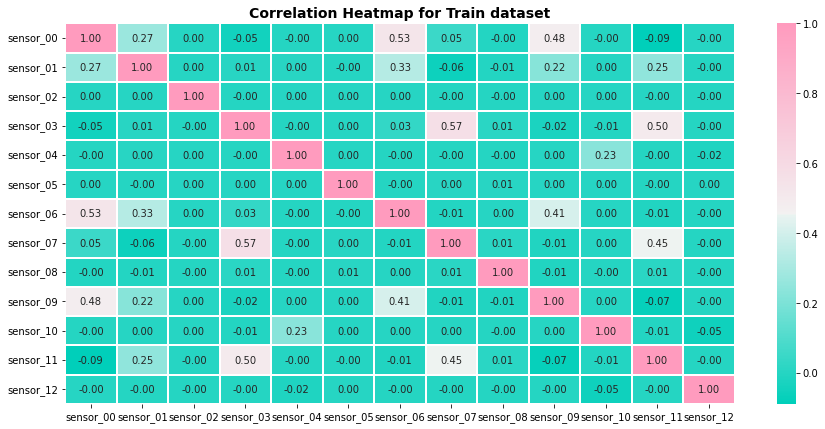

In [8]:
features  = [col for col in test.columns if col not in ("sequence","step","subject")]
plt.figure(figsize = (15,7))

hm = sns.heatmap(train[features].corr(),    # data
                # cmap = 'coolwarm',# style
                cmap = sns.diverging_palette(175, 350, s=100, l=75, center = "light", as_cmap = True),
                annot = True,     # True to show the specific values
                fmt = '.2f',      # set the precision
                linewidths = 0.05)
plt.title('Correlation Heatmap for Train dataset', 
              fontsize=14, 
              fontweight='bold')

Text(0.5, 1.0, 'Correlation Heatmap for Selected columns from Train dataset')

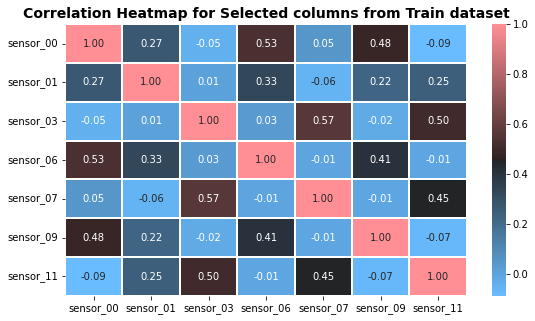

In [9]:
col_t=["sensor_00","sensor_01","sensor_03","sensor_06","sensor_07","sensor_09","sensor_11"]

# set the size of the map
plt.figure(figsize = (9,5))

hm = sns.heatmap(train[col_t].corr(),    # data
                # cmap = 'coolwarm',
                cmap = sns.diverging_palette(250, 10, s=150, l=75, center = "dark", as_cmap = True),
                annot = True,     
                fmt = '.2f', 
                linewidths = 0.05)
plt.title('Correlation Heatmap for Selected columns from Train dataset', 
              fontsize=14, 
              fontweight='bold')

In [10]:
print(plt.rcParams['axes.prop_cycle'])

colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])

plt.rcParams['axes.prop_cycle'] = colors

print(plt.rcParams['axes.prop_cycle'])

cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])


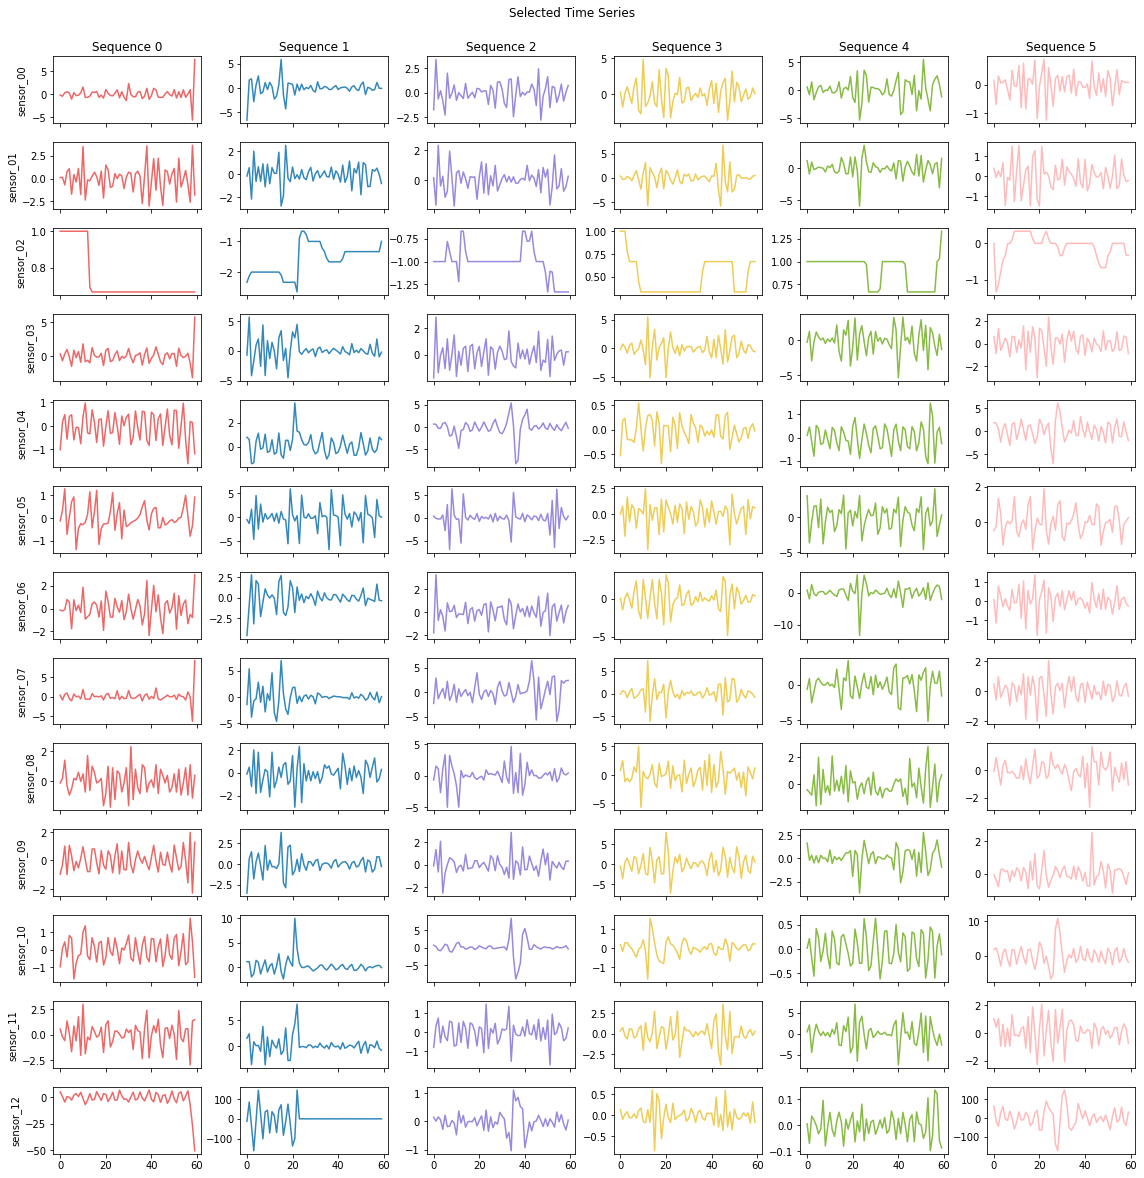

In [11]:
sequences = [0, 1, 2, 3, 4, 5]
figure, axes = plt.subplots(13, len(sequences), sharex=True, figsize=(16, 16))
for i, sequence in enumerate(sequences):
    for sensor in range(13):
        sensor_name = f"sensor_{sensor:02d}"
        plt.subplot(13, len(sequences), sensor * len(sequences) + i + 1)
        plt.plot(range(60), train[train.sequence == sequence][sensor_name],
                # color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i % 10])
                color=plt.rcParams['axes.prop_cycle'].by_key()['color'][i])
        if sensor == 0: plt.title(f"Sequence {sequence}")
        if sequence == sequences[0]: plt.ylabel(sensor_name)
figure.tight_layout(w_pad=0.1)
plt.suptitle('Selected Time Series', y=1.02)
plt.show()

In [12]:
def aggregated_features(df, aggregation_cols = ['sequence'], prefix = ''):
    agg_strategy = {'sensor_00': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_01': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_02': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_03': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_04': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_05': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_06': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_07': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_08': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_09': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_10': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_11': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                    'sensor_12': ['mean', 'max', 'min', 'var', 'mad', 'sum', 'median'],
                   }
    group = df.groupby(aggregation_cols).aggregate(agg_strategy)
    group.columns = ['_'.join(col).strip() for col in group.columns]
    group.columns = [str(prefix) + str(col) for col in group.columns]
    group.reset_index(inplace = True)
    
    temp = (df.groupby(aggregation_cols).size().reset_index(name = str(prefix) + 'size'))
    group = pd.merge(temp, group, how = 'left', on = aggregation_cols,)
    return group

In [13]:
train_merge_data = aggregated_features(train, aggregation_cols = ['sequence', 'subject'])
test_merge_data = aggregated_features(test, aggregation_cols = ['sequence', 'subject'])

In [14]:
train_merge_data

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,sensor_11_mad,sensor_11_sum,sensor_11_median,sensor_12_mean,sensor_12_max,sensor_12_min,sensor_12_var,sensor_12_mad,sensor_12_sum,sensor_12_median
0,0,47,60,0.041744,7.534003,-5.634467,2.049649,0.829612,2.504637,-0.148764,...,0.967853,0.623457,0.193416,-1.286985,6.674766,-50.658994,67.352879,4.388229,-77.219096,-0.447997
1,1,66,60,-0.069294,5.870943,-6.657651,2.540538,0.964271,-4.157651,-0.031298,...,1.089381,11.994856,0.053498,-1.604085,144.598039,-160.234442,2529.213697,26.509574,-96.245098,-0.009591
2,2,66,60,-0.001546,3.402628,-2.797527,1.316816,0.855307,-0.092736,0.058733,...,0.482209,-0.175926,0.083848,0.000945,1.116795,-1.044331,0.130360,0.249470,0.056692,-0.004902
3,3,542,60,0.029869,4.856260,-3.643740,3.131857,1.379164,1.792117,-0.119784,...,1.013548,-1.600823,-0.175926,-0.003708,0.593350,-0.837170,0.058423,0.170745,-0.222506,-0.012361
4,4,437,60,0.059132,5.455951,-5.331530,4.059335,1.495183,3.547913,0.005410,...,2.106692,-5.979424,-0.115741,0.000028,0.135976,-0.098465,0.002663,0.040891,0.001705,0.002344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25963,25963,558,60,0.100773,3.974498,-3.738022,2.395765,1.166378,6.046368,0.193586,...,2.554969,-2.800412,-0.484053,-0.008582,0.297954,-0.262575,0.009317,0.069456,-0.514919,-0.015985
25964,25964,297,60,0.017182,2.927357,-5.220247,1.112449,0.646433,1.030912,0.051777,...,0.611296,0.373457,0.065844,-0.073288,40.998295,-37.633845,339.852061,15.293816,-4.397272,1.085891
25965,25965,129,60,-0.006466,2.818393,-3.422720,1.506580,0.952644,-0.387944,-0.039413,...,1.064532,0.272634,-0.102366,0.020439,2.394714,-2.837170,1.029740,0.798671,1.226343,-0.041560
25966,25966,170,60,-0.040417,1.710974,-2.069552,0.784706,0.679951,-2.425039,-0.051391,...,2.447462,-2.391975,0.056070,-2.050611,48.826939,-56.968031,417.062172,16.170489,-123.036658,-1.701407


In [15]:
test_merge_data

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,sensor_11_mad,sensor_11_sum,sensor_11_median,sensor_12_mean,sensor_12_max,sensor_12_min,sensor_12_var,sensor_12_mad,sensor_12_sum,sensor_12_median
0,25968,684,60,-0.002602,3.146832,-4.950541,1.191898,0.732741,-0.156105,-0.002318,...,1.429141,1.558642,0.121399,-0.000945,0.716539,-0.809889,0.136824,0.285707,-0.056692,-0.008951
1,25969,935,60,0.028516,5.816074,-3.675425,2.102617,0.848916,1.710974,-0.015842,...,0.664750,-0.085391,-0.028292,0.024290,1.224638,-1.237852,0.435241,0.562880,1.457374,-0.021526
2,25970,924,60,0.057664,12.306028,-15.005410,25.843168,4.023308,3.459815,1.079212,...,2.126154,-2.787037,0.217593,0.071284,36.157289,-36.565644,362.057180,16.620936,4.277067,-5.026854
3,25971,769,60,-0.004791,2.876352,-2.465997,0.837073,0.687991,-0.287481,-0.033617,...,0.403864,-0.113169,-0.099280,0.021114,1.488917,-2.574595,0.791889,0.758959,1.266837,-0.036871
4,25972,764,60,-0.001443,17.295209,-9.974498,7.748900,1.083572,-0.086553,-0.171947,...,3.776632,-0.954733,-0.057099,12.399581,323.667093,-328.497869,23462.489498,127.454656,743.974851,21.420716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12213,38181,980,60,-0.047746,5.135240,-3.358578,1.222327,0.673399,-2.864760,-0.101236,...,0.809882,-1.151235,0.028292,-0.071398,174.751492,-152.523444,8077.389404,76.587106,-4.283887,2.260017
12214,38182,915,60,-0.016473,26.738794,-13.154560,20.253989,1.734531,-0.988408,-0.020866,...,6.993171,-4.131687,-0.064300,0.017271,2.039216,-0.813725,0.172651,0.254675,1.036232,0.002558
12215,38183,872,60,-0.005500,8.312983,-4.977589,4.338781,1.264870,-0.329985,-0.093895,...,0.734171,2.815844,0.173354,0.009541,1.105286,-1.072890,0.394999,0.504899,0.572464,-0.050512
12216,38184,835,60,-0.032573,6.951314,-8.993818,10.147920,2.558474,-1.954405,0.421947,...,2.150237,1.092593,0.205247,-0.001549,0.819693,-0.636402,0.188178,0.388402,-0.092924,-0.114876


In [16]:
train_subjects_merge_data = aggregated_features(train, aggregation_cols = ['subject'], prefix = 'subject_')
test_subjects_merge_data = aggregated_features(test, aggregation_cols = ['subject'], prefix = 'subject_')

In [17]:
train_subjects_merge_data.head()

,subject,subject_size,subject_sensor_00_mean,subject_sensor_00_max,subject_sensor_00_min,subject_sensor_00_var,subject_sensor_00_mad,subject_sensor_00_sum,subject_sensor_00_median,subject_sensor_01_mean,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,0,1200,0.001058,3.936631,-4.695518,0.579405,0.524290,1.269706,0.003864,-0.000478,...,0.445067,-3.368313,-0.011831,-0.007687,1.536232,-7.801790,0.371089,0.459001,-9.224211,0.007886
1,1,10500,-0.002550,35.463679,-34.591963,1.546208,0.745773,-26.778980,0.002318,-0.014114,...,0.731817,42.049383,-0.014403,-0.107664,328.472293,-293.231458,4107.284790,50.113950,-1130.476130,0.505754
2,2,2280,0.010308,6.453632,-6.898764,1.465470,0.813444,23.503091,-0.023570,-0.008271,...,0.539252,-19.794239,0.001543,-0.590029,416.050298,-425.902387,23282.308252,126.422564,-1345.265985,-3.700128
3,3,2160,-0.004428,5.753478,-8.153787,0.846161,0.601889,-9.564915,-0.002318,-0.000313,...,0.489554,-2.666667,0.017490,0.000702,1.424552,-1.623615,0.006993,0.044377,1.516624,0.000426
4,4,1560,0.008160,5.770479,-4.090417,0.565596,0.531483,12.729521,-0.008501,0.003920,...,0.614274,5.048354,0.036523,-0.002236,1.789003,-2.025149,0.131529,0.234263,-3.488917,-0.023018


In [18]:
test_subjects_merge_data.head()

,subject,subject_size,subject_sensor_00_mean,subject_sensor_00_max,subject_sensor_00_min,subject_sensor_00_var,subject_sensor_00_mad,subject_sensor_00_sum,subject_sensor_00_median,subject_sensor_01_mean,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,672,1440,0.001602,9.042504,-10.911901,1.373641,0.711675,2.307573,-0.000773,0.000164,...,0.632570,8.123457,0.053498,0.046091,112.827366,-108.803069,1182.309835,23.710997,66.370418,-0.871483
1,673,1920,0.024807,91.731839,-39.096600,6.968395,0.855846,47.629057,0.015070,0.042630,...,0.815219,-17.396091,-0.021605,-0.001110,1.729327,-2.607417,0.042234,0.114705,-2.131287,0.005541
2,674,1620,-0.028497,97.459042,-107.972179,57.467616,2.954017,-46.164606,0.009660,-0.020980,...,1.993735,69.903292,0.021605,-0.387071,117.285166,-108.933078,107.770843,4.703225,-627.055413,-0.034314
3,675,2580,0.000619,10.108192,-7.483771,0.293545,0.328604,1.598145,-0.005410,0.001176,...,0.442446,-26.174897,0.001029,-0.008237,13.695226,-10.021313,0.739102,0.509066,-21.251918,-0.021952
4,676,1800,0.002900,12.474498,-8.465997,1.455461,0.769668,5.219474,-0.005410,0.000503,...,1.221214,-20.040123,0.023148,-0.005220,10.187980,-10.761722,5.482362,1.314982,-9.395567,0.000000


In [19]:
train['sensor_00_lag_01'] = train['sensor_00'].shift(1)
train['sensor_00_lag_10'] = train['sensor_00'].shift(10)
train.head()

,sequence,subject,step,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,state,sensor_00_lag_01,sensor_00_lag_10
0,0,47,0,-0.196291,0.112395,1.0,0.329204,-1.004660,-0.131638,-0.127505,0.368702,-0.1,-0.963873,-0.985069,0.531893,4.751492,0,NaN,NaN
1,0,47,1,-0.447450,0.134454,1.0,-0.658407,0.162495,0.340314,-0.209472,-0.867176,0.2,-0.301301,0.082733,-0.231481,0.454390,0,-0.196291,NaN
2,0,47,2,0.326893,-0.694328,1.0,0.330088,0.473678,1.280479,-0.094718,0.535878,1.4,1.002168,0.449221,-0.586420,-4.736147,0,-0.447450,NaN
3,0,47,3,0.523184,0.751050,1.0,0.976991,-0.563287,-0.720269,0.793260,0.951145,-0.3,-0.995665,-0.434290,1.344650,0.429241,0,0.326893,NaN
4,0,47,4,0.272025,1.074580,1.0,-0.136283,0.398579,0.044877,0.560109,-0.541985,-0.9,1.055636,0.812631,0.123457,-0.223359,0,0.523184,NaN


In [20]:
train_merge_data = train_merge_data.merge(labels, how = 'left', on = 'sequence')

In [21]:
train_merge_data = train_merge_data.merge(train_subjects_merge_data, how = 'left', on = 'subject')
test_merge_data = test_merge_data.merge(test_subjects_merge_data, how = 'left', on = 'subject')
train_merge_data.head()

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,0,47,60,0.041744,7.534003,-5.634467,2.049649,0.829612,2.504637,-0.148764,...,1.382194,-206.570988,0.022634,-0.078774,213.832481,-312.621910,411.832698,12.579934,-491.551151,-0.254476
1,1,66,60,-0.069294,5.870943,-6.657651,2.540538,0.964271,-4.157651,-0.031298,...,1.292805,42.286008,0.034465,-0.707871,268.698210,-317.453112,2151.151810,21.210487,-1189.222933,-0.006181
2,2,66,60,-0.001546,3.402628,-2.797527,1.316816,0.855307,-0.092736,0.058733,...,1.292805,42.286008,0.034465,-0.707871,268.698210,-317.453112,2151.151810,21.210487,-1189.222933,-0.006181
3,3,542,60,0.029869,4.856260,-3.643740,3.131857,1.379164,1.792117,-0.119784,...,1.031835,16.807613,0.023663,0.001263,3.487639,-3.136829,0.284165,0.349181,6.289855,-0.012788
4,4,437,60,0.059132,5.455951,-5.331530,4.059335,1.495183,3.547913,0.005410,...,2.638035,329.658436,0.006173,0.000280,2.629156,-2.805200,0.101305,0.216635,3.347826,0.003410


In [22]:
test_merge_data.head()

,sequence,subject,size,sensor_00_mean,sensor_00_max,sensor_00_min,sensor_00_var,sensor_00_mad,sensor_00_sum,sensor_00_median,...,subject_sensor_11_mad,subject_sensor_11_sum,subject_sensor_11_median,subject_sensor_12_mean,subject_sensor_12_max,subject_sensor_12_min,subject_sensor_12_var,subject_sensor_12_mad,subject_sensor_12_sum,subject_sensor_12_median
0,25968,684,60,-0.002602,3.146832,-4.950541,1.191898,0.732741,-0.156105,-0.002318,...,0.850266,-15.966049,0.012346,-0.001973,2.274936,-3.095055,0.128112,0.257374,-8.288150,-0.001705
1,25969,935,60,0.028516,5.816074,-3.675425,2.102617,0.848916,1.710974,-0.015842,...,0.769165,-12.937243,0.005144,-0.002083,2.197357,-2.149616,0.444153,0.540439,-7.374680,-0.044970
2,25970,924,60,0.057664,12.306028,-15.005410,25.843168,4.023308,3.459815,1.079212,...,3.311826,-101.524691,-0.010802,-0.308142,253.685422,-182.180307,2106.566889,34.328376,-702.563512,-1.936275
3,25971,769,60,-0.004791,2.876352,-2.465997,0.837073,0.687991,-0.287481,-0.033617,...,0.516179,10.443416,-0.002058,-0.001365,19.086957,-17.872975,1.103406,0.666881,-5.732310,-0.070546
4,25972,764,60,-0.001443,17.295209,-9.974498,7.748900,1.083572,-0.086553,-0.171947,...,1.233048,-144.852881,-0.005144,-0.002999,436.830350,-518.899403,17067.111823,106.631204,-8.815857,12.570546


In [23]:
ignore = ['sequence', 'state', 'subject']
features = [feat for feat in train_merge_data.columns if feat not in ignore]
target_feature = 'state'

In [24]:
%%time
from sklearn.model_selection import train_test_split
test_size_pct = 0.20
X_train, X_valid, y_train, y_valid = train_test_split(
                                train_merge_data[features], 
                                train_merge_data[target_feature], 
                                test_size = test_size_pct, 
                                random_state = 16)

CPU times: user 56.2 ms, sys: 32 ms, total: 88.2 ms
Wall time: 90.9 ms


In [25]:
from xgboost  import XGBClassifier

params = {
    'n_estimators': 8192,
    'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 0.96,
    'colsample_bytree': 0.80, 
    'reg_lambda': 1.50,
    'reg_alpha': 6.10,
    'gamma': 1.40,
    'random_state': 16,
    'objective': 'binary:logistic',
    'tree_method': 'gpu_hist',
}

xgb = XGBClassifier(**params)
xgb.fit(X_train, y_train, 
        eval_set = [(X_valid, y_valid)], 
        eval_metric = ['auc','logloss'], 
        early_stopping_rounds = 64, 
        verbose = 32)

[0]	validation_0-auc:0.84085	validation_0-logloss:0.65726
[32]	validation_0-auc:0.89839	validation_0-logloss:0.41042
[64]	validation_0-auc:0.91665	validation_0-logloss:0.36570
[96]	validation_0-auc:0.92622	validation_0-logloss:0.34233
[128]	validation_0-auc:0.93034	validation_0-logloss:0.33100
[160]	validation_0-auc:0.93225	validation_0-logloss:0.32541
[192]	validation_0-auc:0.93290	validation_0-logloss:0.32355
[224]	validation_0-auc:0.93309	validation_0-logloss:0.32303
[256]	validation_0-auc:0.93322	validation_0-logloss:0.32257
[288]	validation_0-auc:0.93332	validation_0-logloss:0.32234
[320]	validation_0-auc:0.93342	validation_0-logloss:0.32207
[352]	validation_0-auc:0.93353	validation_0-logloss:0.32176
[384]	validation_0-auc:0.93354	validation_0-logloss:0.32167
[416]	validation_0-auc:0.93358	validation_0-logloss:0.32161
[448]	validation_0-auc:0.93358	validation_0-logloss:0.32161
[480]	validation_0-auc:0.93378	validation_0-logloss:0.32112
[512]	validation_0-auc:0.93378	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=1.4, gpu_id=0,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=8192, n_jobs=2, num_parallel_tree=1,
              predictor='auto', random_state=16, reg_alpha=6.1, reg_lambda=1.5,
              scale_pos_weight=1, subsample=0.96, tree_method='gpu_hist',
              validate_parameters=1, verbosity=None)

In [26]:
from sklearn.metrics import roc_auc_score

preds = xgb.predict_proba(X_valid)[:, 1]
score = roc_auc_score(y_valid, preds)
print(score)

0.9341110468393108


In [27]:
def plot_feature_importance(importance, names, model_type, max_features = 10):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.head(max_features)

    #Define size of bar plot
    plt.figure(figsize=(8,6))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'], palette="light:salmon_r")
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


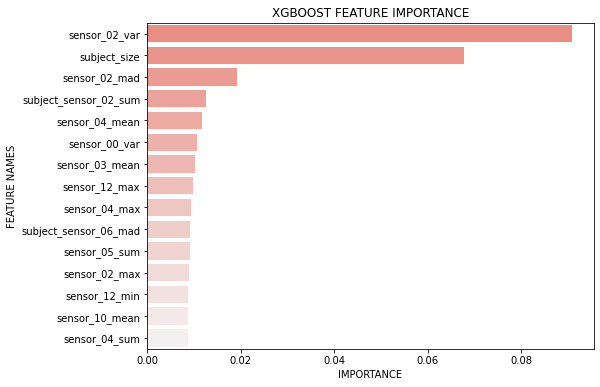

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_feature_importance(xgb.feature_importances_,X_train.columns,'XGBOOST ', max_features = 15)

In [29]:
xgb_preds = xgb.predict_proba(test_merge_data[features])[:, 1]
xgb_preds

array([0.95992523, 0.9660649 , 0.06027285, ..., 0.7262351 , 0.03207482,
       0.10145783], dtype=float32)

In [30]:
submission['state'] = xgb_preds
submission.to_csv('my_submission_xgb.csv', index = False)

In [31]:
submission.head(20)

,sequence,state
0,25968,0.959925
1,25969,0.966065
2,25970,0.060273
3,25971,0.863028
4,25972,0.542460
5,25973,0.419503
6,25974,0.047512
7,25975,0.008124
8,25976,0.989440
9,25977,0.004980


In [32]:
import optuna


def objective(trial):
    params = {
        'n_estimators': 8192,
        'max_depth': trial.suggest_int('max_depth', 8, 16),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.01),
        'subsample': 0.96,
        'colsample_bytree': 0.80,
        'reg_lambda': trial.suggest_float('reg_lambda', 2, 4),
        'reg_alpha': trial.suggest_float('reg_alpha', 8, 16),
        'gamma': trial.suggest_float('gamma', 1, 2),
        'random_state': 16,
        'objective': 'binary:logistic',
        'tree_method': 'gpu_hist',
         }
   
    
    xgb = XGBClassifier(**params)
    
    xgb.fit(
        X_train,
        y_train, 
        eval_set = [(X_valid, y_valid)], 
        eval_metric = ['auc','logloss'], 
        early_stopping_rounds = 64,
        verbose = 32
    )
    
    preds = xgb.predict_proba(X_valid)[:, 1]
    score = roc_auc_score(y_valid, preds)
    return score

In [33]:
study = optuna.create_study(direction = 'maximize' , study_name = 'xgbclassifier')
study.optimize(objective , n_trials = 10)
print('number of the finished trials:' , len(study.trials))
print('the parametors of best trial:' , study.best_trial.params)
print('best value:' , study.best_value)

[I 2022-04-30 20:45:19,798] A new study created in memory with name: xgbclassifier


[0]	validation_0-auc:0.84171	validation_0-logloss:0.69236
[32]	validation_0-auc:0.86600	validation_0-logloss:0.66967
[64]	validation_0-auc:0.86684	validation_0-logloss:0.64921
[96]	validation_0-auc:0.86768	validation_0-logloss:0.63111
[128]	validation_0-auc:0.86827	validation_0-logloss:0.61478
[160]	validation_0-auc:0.86923	validation_0-logloss:0.60002
[192]	validation_0-auc:0.87017	validation_0-logloss:0.58661
[224]	validation_0-auc:0.87105	validation_0-logloss:0.57445
[256]	validation_0-auc:0.87280	validation_0-logloss:0.56338
[288]	validation_0-auc:0.87399	validation_0-logloss:0.55307
[320]	validation_0-auc:0.87488	validation_0-logloss:0.54353
[352]	validation_0-auc:0.87592	validation_0-logloss:0.53493
[384]	validation_0-auc:0.87695	validation_0-logloss:0.52663
[416]	validation_0-auc:0.87824	validation_0-logloss:0.51897
[448]	validation_0-auc:0.87926	validation_0-logloss:0.51188
[480]	validation_0-auc:0.88022	validation_0-logloss:0.50539
[512]	validation_0-auc:0.88132	validation_0-l

[I 2022-04-30 20:47:28,708] Trial 0 finished with value: 0.9309295185547745 and parameters: {'max_depth': 11, 'learning_rate': 0.0020585197641238197, 'reg_lambda': 3.9081050122669208, 'reg_alpha': 12.80116923935582, 'gamma': 1.54623556805165}. Best is trial 0 with value: 0.9309295185547745.


[0]	validation_0-auc:0.84129	validation_0-logloss:0.68934
[32]	validation_0-auc:0.86941	validation_0-logloss:0.59987
[64]	validation_0-auc:0.87355	validation_0-logloss:0.54433
[96]	validation_0-auc:0.87883	validation_0-logloss:0.50672
[128]	validation_0-auc:0.88325	validation_0-logloss:0.47981
[160]	validation_0-auc:0.88731	validation_0-logloss:0.45985
[192]	validation_0-auc:0.89006	validation_0-logloss:0.44516
[224]	validation_0-auc:0.89406	validation_0-logloss:0.43214
[256]	validation_0-auc:0.89736	validation_0-logloss:0.42159
[288]	validation_0-auc:0.90012	validation_0-logloss:0.41305
[320]	validation_0-auc:0.90257	validation_0-logloss:0.40592
[352]	validation_0-auc:0.90485	validation_0-logloss:0.39957
[384]	validation_0-auc:0.90721	validation_0-logloss:0.39336
[416]	validation_0-auc:0.90930	validation_0-logloss:0.38778
[448]	validation_0-auc:0.91137	validation_0-logloss:0.38252
[480]	validation_0-auc:0.91301	validation_0-logloss:0.37817
[512]	validation_0-auc:0.91436	validation_0-l

[I 2022-04-30 20:48:02,728] Trial 1 finished with value: 0.9303945299753791 and parameters: {'max_depth': 13, 'learning_rate': 0.009987193639477782, 'reg_lambda': 2.533951826519286, 'reg_alpha': 14.83721849687988, 'gamma': 1.4226394028792995}. Best is trial 0 with value: 0.9309295185547745.


[0]	validation_0-auc:0.84218	validation_0-logloss:0.69242
[32]	validation_0-auc:0.86202	validation_0-logloss:0.67144
[64]	validation_0-auc:0.86296	validation_0-logloss:0.65238
[96]	validation_0-auc:0.86378	validation_0-logloss:0.63548
[128]	validation_0-auc:0.86408	validation_0-logloss:0.62014
[160]	validation_0-auc:0.86509	validation_0-logloss:0.60620
[192]	validation_0-auc:0.86593	validation_0-logloss:0.59351
[224]	validation_0-auc:0.86665	validation_0-logloss:0.58200
[256]	validation_0-auc:0.86819	validation_0-logloss:0.57157
[288]	validation_0-auc:0.86900	validation_0-logloss:0.56181
[320]	validation_0-auc:0.86976	validation_0-logloss:0.55279
[352]	validation_0-auc:0.87062	validation_0-logloss:0.54463
[384]	validation_0-auc:0.87146	validation_0-logloss:0.53675
[416]	validation_0-auc:0.87245	validation_0-logloss:0.52956
[448]	validation_0-auc:0.87339	validation_0-logloss:0.52283
[480]	validation_0-auc:0.87428	validation_0-logloss:0.51658
[512]	validation_0-auc:0.87522	validation_0-l

[I 2022-04-30 20:49:34,124] Trial 2 finished with value: 0.92981838272374 and parameters: {'max_depth': 8, 'learning_rate': 0.0019505353819739449, 'reg_lambda': 2.6506935130417895, 'reg_alpha': 14.540127671178748, 'gamma': 1.6509013160858332}. Best is trial 0 with value: 0.9309295185547745.


[0]	validation_0-auc:0.84330	validation_0-logloss:0.69175
[32]	validation_0-auc:0.86682	validation_0-logloss:0.65321
[64]	validation_0-auc:0.86794	validation_0-logloss:0.62119
[96]	validation_0-auc:0.86974	validation_0-logloss:0.59478
[128]	validation_0-auc:0.87116	validation_0-logloss:0.57243
[160]	validation_0-auc:0.87350	validation_0-logloss:0.55321
[192]	validation_0-auc:0.87556	validation_0-logloss:0.53661
[224]	validation_0-auc:0.87745	validation_0-logloss:0.52210
[256]	validation_0-auc:0.87997	validation_0-logloss:0.50940
[288]	validation_0-auc:0.88172	validation_0-logloss:0.49816
[320]	validation_0-auc:0.88308	validation_0-logloss:0.48829
[352]	validation_0-auc:0.88459	validation_0-logloss:0.47959
[384]	validation_0-auc:0.88593	validation_0-logloss:0.47153
[416]	validation_0-auc:0.88740	validation_0-logloss:0.46427
[448]	validation_0-auc:0.88859	validation_0-logloss:0.45787
[480]	validation_0-auc:0.88987	validation_0-logloss:0.45195
[512]	validation_0-auc:0.89090	validation_0-l

[I 2022-04-30 20:50:49,532] Trial 3 finished with value: 0.9319266708196139 and parameters: {'max_depth': 10, 'learning_rate': 0.0036365796472229185, 'reg_lambda': 3.217171280199911, 'reg_alpha': 10.899853966479116, 'gamma': 1.583770373859931}. Best is trial 3 with value: 0.9319266708196139.


[0]	validation_0-auc:0.84080	validation_0-logloss:0.68948
[32]	validation_0-auc:0.87030	validation_0-logloss:0.60182
[64]	validation_0-auc:0.87528	validation_0-logloss:0.54602
[96]	validation_0-auc:0.88020	validation_0-logloss:0.50810
[128]	validation_0-auc:0.88479	validation_0-logloss:0.48050
[160]	validation_0-auc:0.88879	validation_0-logloss:0.46010
[192]	validation_0-auc:0.89172	validation_0-logloss:0.44482
[224]	validation_0-auc:0.89504	validation_0-logloss:0.43216
[256]	validation_0-auc:0.89837	validation_0-logloss:0.42132
[288]	validation_0-auc:0.90124	validation_0-logloss:0.41235
[320]	validation_0-auc:0.90367	validation_0-logloss:0.40494
[352]	validation_0-auc:0.90579	validation_0-logloss:0.39859
[384]	validation_0-auc:0.90802	validation_0-logloss:0.39236
[416]	validation_0-auc:0.91017	validation_0-logloss:0.38679
[448]	validation_0-auc:0.91204	validation_0-logloss:0.38174
[480]	validation_0-auc:0.91379	validation_0-logloss:0.37719
[512]	validation_0-auc:0.91529	validation_0-l

[I 2022-04-30 20:51:20,343] Trial 4 finished with value: 0.9308452730562724 and parameters: {'max_depth': 12, 'learning_rate': 0.009541647614228127, 'reg_lambda': 3.0426951963748974, 'reg_alpha': 10.683657872459992, 'gamma': 1.8991286652262809}. Best is trial 3 with value: 0.9319266708196139.


[0]	validation_0-auc:0.84072	validation_0-logloss:0.69000
[32]	validation_0-auc:0.87160	validation_0-logloss:0.61180
[64]	validation_0-auc:0.87499	validation_0-logloss:0.55934
[96]	validation_0-auc:0.87943	validation_0-logloss:0.52193
[128]	validation_0-auc:0.88381	validation_0-logloss:0.49388
[160]	validation_0-auc:0.88766	validation_0-logloss:0.47241
[192]	validation_0-auc:0.89071	validation_0-logloss:0.45580
[224]	validation_0-auc:0.89314	validation_0-logloss:0.44271
[256]	validation_0-auc:0.89590	validation_0-logloss:0.43162
[288]	validation_0-auc:0.89872	validation_0-logloss:0.42184
[320]	validation_0-auc:0.90135	validation_0-logloss:0.41326
[352]	validation_0-auc:0.90349	validation_0-logloss:0.40630
[384]	validation_0-auc:0.90558	validation_0-logloss:0.39995
[416]	validation_0-auc:0.90731	validation_0-logloss:0.39456
[448]	validation_0-auc:0.90933	validation_0-logloss:0.38913
[480]	validation_0-auc:0.91113	validation_0-logloss:0.38425
[512]	validation_0-auc:0.91256	validation_0-l

[I 2022-04-30 20:52:05,106] Trial 5 finished with value: 0.9315794547773726 and parameters: {'max_depth': 15, 'learning_rate': 0.008131478176666415, 'reg_lambda': 3.004987315550487, 'reg_alpha': 10.351482646495665, 'gamma': 1.5521564223805004}. Best is trial 3 with value: 0.9319266708196139.


[0]	validation_0-auc:0.84342	validation_0-logloss:0.69245
[32]	validation_0-auc:0.86636	validation_0-logloss:0.67203
[64]	validation_0-auc:0.86665	validation_0-logloss:0.65342
[96]	validation_0-auc:0.86776	validation_0-logloss:0.63670
[128]	validation_0-auc:0.86812	validation_0-logloss:0.62147
[160]	validation_0-auc:0.86920	validation_0-logloss:0.60755
[192]	validation_0-auc:0.87035	validation_0-logloss:0.59476
[224]	validation_0-auc:0.87117	validation_0-logloss:0.58310
[256]	validation_0-auc:0.87276	validation_0-logloss:0.57245
[288]	validation_0-auc:0.87399	validation_0-logloss:0.56244
[320]	validation_0-auc:0.87481	validation_0-logloss:0.55315
[352]	validation_0-auc:0.87570	validation_0-logloss:0.54469
[384]	validation_0-auc:0.87655	validation_0-logloss:0.53654
[416]	validation_0-auc:0.87778	validation_0-logloss:0.52899
[448]	validation_0-auc:0.87872	validation_0-logloss:0.52194
[480]	validation_0-auc:0.87961	validation_0-logloss:0.51540
[512]	validation_0-auc:0.88059	validation_0-l

[I 2022-04-30 20:54:29,090] Trial 6 finished with value: 0.9337861528877816 and parameters: {'max_depth': 9, 'learning_rate': 0.0018262577852802778, 'reg_lambda': 2.7825306678224644, 'reg_alpha': 9.551820969174985, 'gamma': 1.0693390042375945}. Best is trial 6 with value: 0.9337861528877816.


[0]	validation_0-auc:0.84006	validation_0-logloss:0.69067
[32]	validation_0-auc:0.87145	validation_0-logloss:0.62630
[64]	validation_0-auc:0.87350	validation_0-logloss:0.57962
[96]	validation_0-auc:0.87693	validation_0-logloss:0.54458
[128]	validation_0-auc:0.88129	validation_0-logloss:0.51686
[160]	validation_0-auc:0.88500	validation_0-logloss:0.49471
[192]	validation_0-auc:0.88757	validation_0-logloss:0.47713
[224]	validation_0-auc:0.89008	validation_0-logloss:0.46264
[256]	validation_0-auc:0.89228	validation_0-logloss:0.45068
[288]	validation_0-auc:0.89414	validation_0-logloss:0.44079
[320]	validation_0-auc:0.89608	validation_0-logloss:0.43207
[352]	validation_0-auc:0.89840	validation_0-logloss:0.42393
[384]	validation_0-auc:0.90068	validation_0-logloss:0.41647
[416]	validation_0-auc:0.90261	validation_0-logloss:0.41018
[448]	validation_0-auc:0.90413	validation_0-logloss:0.40484
[480]	validation_0-auc:0.90571	validation_0-logloss:0.39982
[512]	validation_0-auc:0.90708	validation_0-l

[I 2022-04-30 20:55:44,168] Trial 7 finished with value: 0.9330785203642726 and parameters: {'max_depth': 15, 'learning_rate': 0.00636398321708097, 'reg_lambda': 2.7966822453824225, 'reg_alpha': 10.053663881772817, 'gamma': 1.0328843331762538}. Best is trial 6 with value: 0.9337861528877816.


[0]	validation_0-auc:0.84289	validation_0-logloss:0.69276
[32]	validation_0-auc:0.86767	validation_0-logloss:0.68112
[64]	validation_0-auc:0.86754	validation_0-logloss:0.67002
[96]	validation_0-auc:0.86828	validation_0-logloss:0.65962
[128]	validation_0-auc:0.86871	validation_0-logloss:0.64976
[160]	validation_0-auc:0.86950	validation_0-logloss:0.64038
[192]	validation_0-auc:0.87014	validation_0-logloss:0.63153
[224]	validation_0-auc:0.87053	validation_0-logloss:0.62313
[256]	validation_0-auc:0.87176	validation_0-logloss:0.61530
[288]	validation_0-auc:0.87218	validation_0-logloss:0.60769
[320]	validation_0-auc:0.87248	validation_0-logloss:0.60042
[352]	validation_0-auc:0.87320	validation_0-logloss:0.59356
[384]	validation_0-auc:0.87335	validation_0-logloss:0.58688
[416]	validation_0-auc:0.87402	validation_0-logloss:0.58055
[448]	validation_0-auc:0.87452	validation_0-logloss:0.57448
[480]	validation_0-auc:0.87489	validation_0-logloss:0.56875
[512]	validation_0-auc:0.87548	validation_0-l

[I 2022-04-30 20:59:00,661] Trial 8 finished with value: 0.9271225267716771 and parameters: {'max_depth': 11, 'learning_rate': 0.0010070681878576312, 'reg_lambda': 3.268370355632116, 'reg_alpha': 9.437860808237371, 'gamma': 1.9481836034186386}. Best is trial 6 with value: 0.9337861528877816.


[0]	validation_0-auc:0.84067	validation_0-logloss:0.69230
[32]	validation_0-auc:0.86840	validation_0-logloss:0.66779
[64]	validation_0-auc:0.86894	validation_0-logloss:0.64591
[96]	validation_0-auc:0.86991	validation_0-logloss:0.62665
[128]	validation_0-auc:0.87037	validation_0-logloss:0.60942
[160]	validation_0-auc:0.87156	validation_0-logloss:0.59381
[192]	validation_0-auc:0.87259	validation_0-logloss:0.57974
[224]	validation_0-auc:0.87383	validation_0-logloss:0.56695
[256]	validation_0-auc:0.87579	validation_0-logloss:0.55536
[288]	validation_0-auc:0.87721	validation_0-logloss:0.54461
[320]	validation_0-auc:0.87818	validation_0-logloss:0.53478
[352]	validation_0-auc:0.87928	validation_0-logloss:0.52590
[384]	validation_0-auc:0.88035	validation_0-logloss:0.51739
[416]	validation_0-auc:0.88176	validation_0-logloss:0.50954
[448]	validation_0-auc:0.88286	validation_0-logloss:0.50229
[480]	validation_0-auc:0.88392	validation_0-logloss:0.49563
[512]	validation_0-auc:0.88500	validation_0-l

[I 2022-04-30 21:01:19,663] Trial 9 finished with value: 0.9318722375485747 and parameters: {'max_depth': 12, 'learning_rate': 0.0021895781890201938, 'reg_lambda': 3.221594988396058, 'reg_alpha': 10.650925228795085, 'gamma': 1.5436215896439207}. Best is trial 6 with value: 0.9337861528877816.


number of the finished trials: 10
the parametors of best trial: {'max_depth': 9, 'learning_rate': 0.0018262577852802778, 'reg_lambda': 2.7825306678224644, 'reg_alpha': 9.551820969174985, 'gamma': 1.0693390042375945}
best value: 0.9337861528877816


In [34]:
params = study.best_trial.params

print(params)

{'max_depth': 9, 'learning_rate': 0.0018262577852802778, 'reg_lambda': 2.7825306678224644, 'reg_alpha': 9.551820969174985, 'gamma': 1.0693390042375945}


In [35]:
xgb = XGBClassifier(**params)
    
xgb.fit(
    X_train,
    y_train, 
    eval_set = [(X_valid, y_valid)], 
    eval_metric = ['auc','logloss'], 
    early_stopping_rounds = 64, 
    verbose = 32
)

[0]	validation_0-auc:0.84195	validation_0-logloss:0.69244
[32]	validation_0-auc:0.84823	validation_0-logloss:0.67121
[64]	validation_0-auc:0.85397	validation_0-logloss:0.65236
[96]	validation_0-auc:0.85622	validation_0-logloss:0.63544
[99]	validation_0-auc:0.85636	validation_0-logloss:0.63394


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=1.0693390042375945, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.0018262577852802778,
              max_delta_step=0, max_depth=9, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=9.551820969174985, reg_lambda=2.7825306678224644,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [36]:
best_xgb_preds = xgb.predict_proba(test_merge_data[features])[:, 1]
best_submission = submission.copy()
best_submission['state'] = best_xgb_preds
best_submission.to_csv('best_submission_xgb.csv', index = False)

In [37]:
best_submission

,sequence,state
0,25968,0.561365
1,25969,0.561365
2,25970,0.456092
3,25971,0.465978
4,25972,0.504503
...,...,...
12213,38181,0.538591
12214,38182,0.496035
12215,38183,0.548111
12216,38184,0.440358
